# General data reader for AQUA 
## Example of datasets on Lumi

We added a few new data sources to the intake catalogue, pointing to resources already available on LUMI.

### Inspecting available datasets

Multiple datasets area available also for observations, so that we can also inspect the catalogue by checking what is inside. This can be done with the `inspect_catalogue` function

In [1]:
from aqua import catalogue, inspect_catalogue
cat = catalogue()

FESOM	test-pi	5km experiment, coupuled with IFS
	- elem_grid	
	- node_grid	
	- original_2d	original 2d output
	- original_3d	original 3d output

IFS	test-tco79	5km experiment, coupuled with IFS
	- original_2d	original 2d output
IFS	tco79-eORCA1	tco79-eORCA1 data
	- ICMGG_atm2d	



Here below a short exploration at cataogue, model and experiment level

In [2]:
inspect_catalogue(cat)

Models available in catalogue:


['FESOM', 'IFS']

In [3]:
inspect_catalogue(cat, model = 'IFS')

Experiments available in catalogue for model IFS:


['test-tco79', 'tco79-eORCA1']

In [4]:
inspect_catalogue(cat, model = 'IFS', exp = 'tco79-eORCA1')

Sources available in catalogue for model IFS and exp tco79-eORCA1:


['ICMGG_atm2d']

### IFS data

In [14]:
from aqua import Reader
reader = Reader(model="IFS", exp="tco79-eORCA1", source="ICMGG_atm2d",areas=False)

In [8]:
data = reader.retrieve()

In [9]:
data

<xarray.Dataset>
Dimensions:    (time: 8305, value: 28480, level: 5)
Coordinates:
    lat        (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * level      (level) int64 1 2 3 4 5
    lon        (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20 ... 2020-12-31
Dimensions without coordinates: value
Data variables: (12/87)
    100si      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    100u       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    100v       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    10u        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    10v        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    2d         (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    ...         ...
    vike       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vipie      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vipile     (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vithe      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    z          (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    zos        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

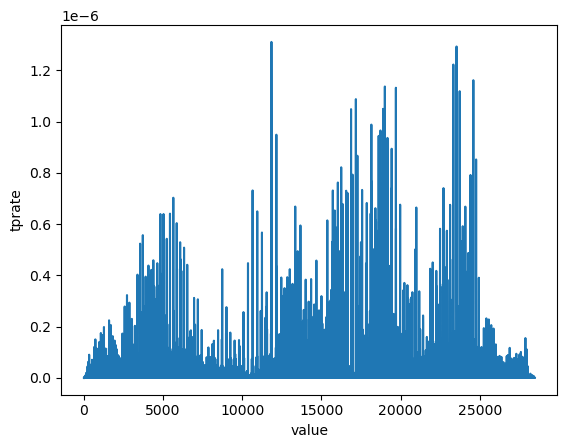

In [15]:
data.tprate.isel(time=[0,1,2,3,4]).mean("time").plot()